In [25]:
##quitar cuando acabe
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [26]:
from sklearn import utils
import wandb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

# local modules
from utils.config import Config
import utils.utils as utils
import modelsNN.modelsNN as modelsNN

In [27]:
# PATH_DEEPSF = '/content/gdrive/MyDrive/deepsf/code_JS/folder_rawdata_processing/'
# PATH_DEEPSF = '..'
PATH_DEEPSF = 'C:/Users/joseb/Downloads/'
# PATH_DEEPSF = '..'

In [28]:
# %%% Setting deepsf NN characteristics. (para hacer wandb hacer un bucle con la conf 
                                        #dejando fuera el data prep que solo lo llames una vez)
config = Config(epochs = 3000,
                num_genes = 5000,
                if_wandb='True')
# config = Config()
print(config.get_config())

{'batch_size': 32, 'optimizer': 'sgd90', 'modelNN': 'DeepSF_2hidden', 'epochs': 3000, 'learning_rate': 0.1, 'if_toy': True, 'if_wandb': 'True', 'test_size': 0.2, 'num_genes': 5000}


In [29]:
# %%% Get the data
data_prep = utils.get_data(PATH_DEEPSF, config)

In [30]:
# Try experiments:
learning_rate = [1e-1, 1e-2]
optim = ['sgd90', 'adam', 'adagrad', 'adadelta', 'adamW',  'adamax', 'RMSProp']

{'batch_size': 32, 'optimizer': 'sgd90', 'modelNN': 'DeepSF_2hidden', 'epochs': 3000, 'learning_rate': 0.1, 'if_toy': True, 'if_wandb': 'True', 'test_size': 0.2, 'num_genes': 5000} 



Epoch [0], loss: 2.6335, val_loss: 3.4906
Epoch [1], loss: 2.6248, val_loss: 3.4808
Epoch [2], loss: 2.6083, val_loss: 3.4596
Epoch [3], loss: 2.5775, val_loss: 3.4230
Epoch [4], loss: 2.5281, val_loss: 3.3645
Epoch [5], loss: 2.4398, val_loss: 3.2581
Epoch [6], loss: 2.2861, val_loss: 3.0770
Epoch [7], loss: 2.0587, val_loss: 2.8322
Epoch [8], loss: 1.7772, val_loss: 2.5673
Epoch [9], loss: 1.5141, val_loss: 2.3610
Epoch [10], loss: 1.3173, val_loss: 2.2108
Epoch [11], loss: 1.1931, val_loss: 2.1196
Epoch [12], loss: 1.1175, val_loss: 2.0482
Epoch [13], loss: 1.0671, val_loss: 2.0160
Epoch [14], loss: 1.0331, val_loss: 1.9972
Epoch [15], loss: 1.0067, val_loss: 1.9594
Epoch [16], loss: 0.9871, val_loss: 1.9410
Epoch [17], loss: 0.9719, val_loss: 1.9415
Epoch [18], loss: 0.9618, val_loss: 1.9167
Epoch [19], loss: 0.9520, val_loss: 1.9133
Epoch [20], loss: 0.9463, val_loss: 1.8933
Epoch [21], loss: 0.9382, val_loss: 1.8818
Epoch [22], loss: 0.9294, val_loss: 1.8730
Epoch [23], loss: 0.9

Epoch [189], loss: 0.7046, val_loss: 1.5372
Epoch [190], loss: 0.7037, val_loss: 1.5360
Epoch [191], loss: 0.7034, val_loss: 1.5355
Epoch [192], loss: 0.7022, val_loss: 1.5339
Epoch [193], loss: 0.7014, val_loss: 1.5334
Epoch [194], loss: 0.7007, val_loss: 1.5324
Epoch [195], loss: 0.7001, val_loss: 1.5318
Epoch [196], loss: 0.6993, val_loss: 1.5308
Epoch [197], loss: 0.6986, val_loss: 1.5300
Epoch [198], loss: 0.6975, val_loss: 1.5285
Epoch [199], loss: 0.6968, val_loss: 1.5276
Epoch [200], loss: 0.6962, val_loss: 1.5269
Epoch [201], loss: 0.6956, val_loss: 1.5265
Epoch [202], loss: 0.6948, val_loss: 1.5252
Epoch [203], loss: 0.6938, val_loss: 1.5241
Epoch [204], loss: 0.6928, val_loss: 1.5231
Epoch [205], loss: 0.6920, val_loss: 1.5224
Epoch [206], loss: 0.6913, val_loss: 1.5211
Epoch [207], loss: 0.6908, val_loss: 1.5210
Epoch [208], loss: 0.6899, val_loss: 1.5190
Epoch [209], loss: 0.6892, val_loss: 1.5185
Epoch [210], loss: 0.6882, val_loss: 1.5175
Epoch [211], loss: 0.6874, val_l

Epoch [376], loss: 0.6123, val_loss: 1.4342
Epoch [377], loss: 0.6120, val_loss: 1.4342
Epoch [378], loss: 0.6117, val_loss: 1.4334
Epoch [379], loss: 0.6114, val_loss: 1.4334
Epoch [380], loss: 0.6111, val_loss: 1.4332
Epoch [381], loss: 0.6109, val_loss: 1.4330
Epoch [382], loss: 0.6107, val_loss: 1.4327
Epoch [383], loss: 0.6105, val_loss: 1.4323
Epoch [384], loss: 0.6104, val_loss: 1.4323
Epoch [385], loss: 0.6102, val_loss: 1.4319
Epoch [386], loss: 0.6095, val_loss: 1.4297
Epoch [387], loss: 0.6074, val_loss: 1.4297
Epoch [388], loss: 0.6072, val_loss: 1.4295
Epoch [389], loss: 0.6069, val_loss: 1.4292
Epoch [390], loss: 0.6067, val_loss: 1.4287
Epoch [391], loss: 0.6063, val_loss: 1.4286
Epoch [392], loss: 0.6061, val_loss: 1.4281
Epoch [393], loss: 0.6060, val_loss: 1.4282
Epoch [394], loss: 0.6059, val_loss: 1.4276
Epoch [395], loss: 0.6058, val_loss: 1.4280
Epoch [396], loss: 0.6055, val_loss: 1.4274
Epoch [397], loss: 0.6052, val_loss: 1.4274
Epoch [398], loss: 0.6051, val_l

Epoch [563], loss: 0.5796, val_loss: 1.4014
Epoch [564], loss: 0.5796, val_loss: 1.4011
Epoch [565], loss: 0.5794, val_loss: 1.4011
Epoch [566], loss: 0.5794, val_loss: 1.4009
Epoch [567], loss: 0.5793, val_loss: 1.4013
Epoch [568], loss: 0.5792, val_loss: 1.4008
Epoch [569], loss: 0.5790, val_loss: 1.4009
Epoch [570], loss: 0.5789, val_loss: 1.4008
Epoch [571], loss: 0.5787, val_loss: 1.4008
Epoch [572], loss: 0.5786, val_loss: 1.4004
Epoch [573], loss: 0.5785, val_loss: 1.4004
Epoch [574], loss: 0.5784, val_loss: 1.3999
Epoch [575], loss: 0.5784, val_loss: 1.4001
Epoch [576], loss: 0.5783, val_loss: 1.4002
Epoch [577], loss: 0.5782, val_loss: 1.3997
Epoch [578], loss: 0.5780, val_loss: 1.3997
Epoch [579], loss: 0.5778, val_loss: 1.3997
Epoch [580], loss: 0.5779, val_loss: 1.3995
Epoch [581], loss: 0.5775, val_loss: 1.3992
Epoch [582], loss: 0.5773, val_loss: 1.3991
Epoch [583], loss: 0.5772, val_loss: 1.3989
Epoch [584], loss: 0.5771, val_loss: 1.3989
Epoch [585], loss: 0.5770, val_l

Epoch [750], loss: 0.5580, val_loss: 1.3793
Epoch [751], loss: 0.5579, val_loss: 1.3794
Epoch [752], loss: 0.5578, val_loss: 1.3795
Epoch [753], loss: 0.5577, val_loss: 1.3792
Epoch [754], loss: 0.5576, val_loss: 1.3793
Epoch [755], loss: 0.5575, val_loss: 1.3789
Epoch [756], loss: 0.5573, val_loss: 1.3789
Epoch [757], loss: 0.5573, val_loss: 1.3786
Epoch [758], loss: 0.5572, val_loss: 1.3787
Epoch [759], loss: 0.5571, val_loss: 1.3788
Epoch [760], loss: 0.5570, val_loss: 1.3784
Epoch [761], loss: 0.5569, val_loss: 1.3784
Epoch [762], loss: 0.5568, val_loss: 1.3784
Epoch [763], loss: 0.5567, val_loss: 1.3781
Epoch [764], loss: 0.5566, val_loss: 1.3782
Epoch [765], loss: 0.5565, val_loss: 1.3784
Epoch [766], loss: 0.5564, val_loss: 1.3779
Epoch [767], loss: 0.5563, val_loss: 1.3779
Epoch [768], loss: 0.5562, val_loss: 1.3777
Epoch [769], loss: 0.5561, val_loss: 1.3775
Epoch [770], loss: 0.5560, val_loss: 1.3774
Epoch [771], loss: 0.5559, val_loss: 1.3774
Epoch [772], loss: 0.5558, val_l

Epoch [937], loss: 0.5402, val_loss: 1.3612
Epoch [938], loss: 0.5400, val_loss: 1.3610
Epoch [939], loss: 0.5400, val_loss: 1.3613
Epoch [940], loss: 0.5399, val_loss: 1.3609
Epoch [941], loss: 0.5399, val_loss: 1.3610
Epoch [942], loss: 0.5398, val_loss: 1.3608
Epoch [943], loss: 0.5397, val_loss: 1.3608
Epoch [944], loss: 0.5396, val_loss: 1.3608
Epoch [945], loss: 0.5395, val_loss: 1.3606
Epoch [946], loss: 0.5395, val_loss: 1.3605
Epoch [947], loss: 0.5393, val_loss: 1.3605
Epoch [948], loss: 0.5392, val_loss: 1.3602
Epoch [949], loss: 0.5390, val_loss: 1.3602
Epoch [950], loss: 0.5390, val_loss: 1.3601
Epoch [951], loss: 0.5389, val_loss: 1.3603
Epoch [952], loss: 0.5388, val_loss: 1.3600
Epoch [953], loss: 0.5388, val_loss: 1.3598
Epoch [954], loss: 0.5387, val_loss: 1.3600
Epoch [955], loss: 0.5386, val_loss: 1.3597
Epoch [956], loss: 0.5385, val_loss: 1.3597
Epoch [957], loss: 0.5382, val_loss: 1.3594
Epoch [958], loss: 0.5381, val_loss: 1.3594
Epoch [959], loss: 0.5380, val_l

Epoch [1121], loss: 0.5266, val_loss: 1.3479
Epoch [1122], loss: 0.5265, val_loss: 1.3479
Epoch [1123], loss: 0.5265, val_loss: 1.3478
Epoch [1124], loss: 0.5264, val_loss: 1.3477
Epoch [1125], loss: 0.5263, val_loss: 1.3477
Epoch [1126], loss: 0.5263, val_loss: 1.3476
Epoch [1127], loss: 0.5262, val_loss: 1.3475
Epoch [1128], loss: 0.5262, val_loss: 1.3475
Epoch [1129], loss: 0.5261, val_loss: 1.3477
Epoch [1130], loss: 0.5261, val_loss: 1.3474
Epoch [1131], loss: 0.5260, val_loss: 1.3473
Epoch [1132], loss: 0.5259, val_loss: 1.3473
Epoch [1133], loss: 0.5259, val_loss: 1.3472
Epoch [1134], loss: 0.5258, val_loss: 1.3470
Epoch [1135], loss: 0.5258, val_loss: 1.3471
Epoch [1136], loss: 0.5257, val_loss: 1.3470
Epoch [1137], loss: 0.5256, val_loss: 1.3471
Epoch [1138], loss: 0.5255, val_loss: 1.3468
Epoch [1139], loss: 0.5255, val_loss: 1.3469
Epoch [1140], loss: 0.5254, val_loss: 1.3465
Epoch [1141], loss: 0.5254, val_loss: 1.3466
Epoch [1142], loss: 0.5253, val_loss: 1.3467
Epoch [114

Epoch [1304], loss: 0.5158, val_loss: 1.3373
Epoch [1305], loss: 0.5157, val_loss: 1.3371
Epoch [1306], loss: 0.5156, val_loss: 1.3372
Epoch [1307], loss: 0.5155, val_loss: 1.3371
Epoch [1308], loss: 0.5155, val_loss: 1.3370
Epoch [1309], loss: 0.5155, val_loss: 1.3370
Epoch [1310], loss: 0.5155, val_loss: 1.3370
Epoch [1311], loss: 0.5153, val_loss: 1.3369
Epoch [1312], loss: 0.5153, val_loss: 1.3366
Epoch [1313], loss: 0.5153, val_loss: 1.3367
Epoch [1314], loss: 0.5152, val_loss: 1.3367
Epoch [1315], loss: 0.5152, val_loss: 1.3366
Epoch [1316], loss: 0.5151, val_loss: 1.3366
Epoch [1317], loss: 0.5150, val_loss: 1.3365
Epoch [1318], loss: 0.5150, val_loss: 1.3365
Epoch [1319], loss: 0.5149, val_loss: 1.3362
Epoch [1320], loss: 0.5149, val_loss: 1.3364
Epoch [1321], loss: 0.5148, val_loss: 1.3363
Epoch [1322], loss: 0.5148, val_loss: 1.3363
Epoch [1323], loss: 0.5147, val_loss: 1.3362
Epoch [1324], loss: 0.5146, val_loss: 1.3362
Epoch [1325], loss: 0.5146, val_loss: 1.3361
Epoch [132

Epoch [1487], loss: 0.5060, val_loss: 1.3275
Epoch [1488], loss: 0.5060, val_loss: 1.3275
Epoch [1489], loss: 0.5060, val_loss: 1.3274
Epoch [1490], loss: 0.5059, val_loss: 1.3274
Epoch [1491], loss: 0.5059, val_loss: 1.3274
Epoch [1492], loss: 0.5058, val_loss: 1.3272
Epoch [1493], loss: 0.5057, val_loss: 1.3273
Epoch [1494], loss: 0.5057, val_loss: 1.3271
Epoch [1495], loss: 0.5057, val_loss: 1.3272
Epoch [1496], loss: 0.5057, val_loss: 1.3272
Epoch [1497], loss: 0.5056, val_loss: 1.3270
Epoch [1498], loss: 0.5055, val_loss: 1.3270
Epoch [1499], loss: 0.5055, val_loss: 1.3269
Epoch [1500], loss: 0.5054, val_loss: 1.3269
Epoch [1501], loss: 0.5054, val_loss: 1.3269
Epoch [1502], loss: 0.5054, val_loss: 1.3268
Epoch [1503], loss: 0.5053, val_loss: 1.3269
Epoch [1504], loss: 0.5053, val_loss: 1.3268
Epoch [1505], loss: 0.5052, val_loss: 1.3266
Epoch [1506], loss: 0.5052, val_loss: 1.3266
Epoch [1507], loss: 0.5052, val_loss: 1.3266
Epoch [1508], loss: 0.5051, val_loss: 1.3266
Epoch [150

Epoch [1670], loss: 0.4977, val_loss: 1.3191
Epoch [1671], loss: 0.4976, val_loss: 1.3191
Epoch [1672], loss: 0.4976, val_loss: 1.3191
Epoch [1673], loss: 0.4976, val_loss: 1.3190
Epoch [1674], loss: 0.4975, val_loss: 1.3189
Epoch [1675], loss: 0.4975, val_loss: 1.3190
Epoch [1676], loss: 0.4974, val_loss: 1.3188
Epoch [1677], loss: 0.4974, val_loss: 1.3188
Epoch [1678], loss: 0.4974, val_loss: 1.3188
Epoch [1679], loss: 0.4973, val_loss: 1.3188
Epoch [1680], loss: 0.4973, val_loss: 1.3188
Epoch [1681], loss: 0.4972, val_loss: 1.3187
Epoch [1682], loss: 0.4972, val_loss: 1.3186
Epoch [1683], loss: 0.4972, val_loss: 1.3185
Epoch [1684], loss: 0.4971, val_loss: 1.3185
Epoch [1685], loss: 0.4971, val_loss: 1.3186
Epoch [1686], loss: 0.4971, val_loss: 1.3184
Epoch [1687], loss: 0.4970, val_loss: 1.3185
Epoch [1688], loss: 0.4970, val_loss: 1.3183
Epoch [1689], loss: 0.4969, val_loss: 1.3184
Epoch [1690], loss: 0.4969, val_loss: 1.3183
Epoch [1691], loss: 0.4969, val_loss: 1.3183
Epoch [169

Epoch [1853], loss: 0.4908, val_loss: 1.3123
Epoch [1854], loss: 0.4907, val_loss: 1.3122
Epoch [1855], loss: 0.4907, val_loss: 1.3121
Epoch [1856], loss: 0.4907, val_loss: 1.3121
Epoch [1857], loss: 0.4906, val_loss: 1.3120
Epoch [1858], loss: 0.4906, val_loss: 1.3121
Epoch [1859], loss: 0.4905, val_loss: 1.3120
Epoch [1860], loss: 0.4905, val_loss: 1.3120
Epoch [1861], loss: 0.4905, val_loss: 1.3119
Epoch [1862], loss: 0.4905, val_loss: 1.3119
Epoch [1863], loss: 0.4904, val_loss: 1.3118
Epoch [1864], loss: 0.4903, val_loss: 1.3119
Epoch [1865], loss: 0.4903, val_loss: 1.3118
Epoch [1866], loss: 0.4903, val_loss: 1.3118
Epoch [1867], loss: 0.4902, val_loss: 1.3117
Epoch [1868], loss: 0.4902, val_loss: 1.3117
Epoch [1869], loss: 0.4901, val_loss: 1.3116
Epoch [1870], loss: 0.4901, val_loss: 1.3117
Epoch [1871], loss: 0.4901, val_loss: 1.3115
Epoch [1872], loss: 0.4900, val_loss: 1.3115
Epoch [1873], loss: 0.4900, val_loss: 1.3115
Epoch [1874], loss: 0.4900, val_loss: 1.3115
Epoch [187

Epoch [2036], loss: 0.4837, val_loss: 1.3052
Epoch [2037], loss: 0.4836, val_loss: 1.3051
Epoch [2038], loss: 0.4836, val_loss: 1.3051
Epoch [2039], loss: 0.4835, val_loss: 1.3051
Epoch [2040], loss: 0.4835, val_loss: 1.3051
Epoch [2041], loss: 0.4835, val_loss: 1.3051
Epoch [2042], loss: 0.4835, val_loss: 1.3050
Epoch [2043], loss: 0.4834, val_loss: 1.3050
Epoch [2044], loss: 0.4834, val_loss: 1.3049
Epoch [2045], loss: 0.4834, val_loss: 1.3049
Epoch [2046], loss: 0.4833, val_loss: 1.3049
Epoch [2047], loss: 0.4833, val_loss: 1.3049
Epoch [2048], loss: 0.4833, val_loss: 1.3048
Epoch [2049], loss: 0.4832, val_loss: 1.3047
Epoch [2050], loss: 0.4832, val_loss: 1.3047
Epoch [2051], loss: 0.4831, val_loss: 1.3047
Epoch [2052], loss: 0.4832, val_loss: 1.3047
Epoch [2053], loss: 0.4831, val_loss: 1.3047
Epoch [2054], loss: 0.4831, val_loss: 1.3046
Epoch [2055], loss: 0.4831, val_loss: 1.3047
Epoch [2056], loss: 0.4830, val_loss: 1.3046
Epoch [2057], loss: 0.4830, val_loss: 1.3046
Epoch [205

Epoch [2219], loss: 0.4777, val_loss: 1.2994
Epoch [2220], loss: 0.4777, val_loss: 1.2994
Epoch [2221], loss: 0.4777, val_loss: 1.2993
Epoch [2222], loss: 0.4776, val_loss: 1.2993
Epoch [2223], loss: 0.4776, val_loss: 1.2993
Epoch [2224], loss: 0.4776, val_loss: 1.2993
Epoch [2225], loss: 0.4775, val_loss: 1.2993
Epoch [2226], loss: 0.4775, val_loss: 1.2992
Epoch [2227], loss: 0.4775, val_loss: 1.2992
Epoch [2228], loss: 0.4774, val_loss: 1.2991
Epoch [2229], loss: 0.4774, val_loss: 1.2992
Epoch [2230], loss: 0.4774, val_loss: 1.2991
Epoch [2231], loss: 0.4774, val_loss: 1.2991
Epoch [2232], loss: 0.4773, val_loss: 1.2990
Epoch [2233], loss: 0.4773, val_loss: 1.2990
Epoch [2234], loss: 0.4773, val_loss: 1.2991
Epoch [2235], loss: 0.4773, val_loss: 1.2991
Epoch [2236], loss: 0.4772, val_loss: 1.2990
Epoch [2237], loss: 0.4772, val_loss: 1.2990
Epoch [2238], loss: 0.4772, val_loss: 1.2989
Epoch [2239], loss: 0.4772, val_loss: 1.2988
Epoch [2240], loss: 0.4771, val_loss: 1.2988
Epoch [224

Epoch [2402], loss: 0.4728, val_loss: 1.2958
Epoch [2403], loss: 0.4728, val_loss: 1.2958
Epoch [2404], loss: 0.4728, val_loss: 1.2958
Epoch [2405], loss: 0.4727, val_loss: 1.2958
Epoch [2406], loss: 0.4727, val_loss: 1.2957
Epoch [2407], loss: 0.4727, val_loss: 1.2957
Epoch [2408], loss: 0.4727, val_loss: 1.2957
Epoch [2409], loss: 0.4727, val_loss: 1.2958
Epoch [2410], loss: 0.4726, val_loss: 1.2957
Epoch [2411], loss: 0.4726, val_loss: 1.2956
Epoch [2412], loss: 0.4726, val_loss: 1.2957
Epoch [2413], loss: 0.4726, val_loss: 1.2957
Epoch [2414], loss: 0.4725, val_loss: 1.2956
Epoch [2415], loss: 0.4725, val_loss: 1.2956
Epoch [2416], loss: 0.4725, val_loss: 1.2956
Epoch [2417], loss: 0.4724, val_loss: 1.2956
Epoch [2418], loss: 0.4724, val_loss: 1.2956
Epoch [2419], loss: 0.4724, val_loss: 1.2956
Epoch [2420], loss: 0.4724, val_loss: 1.2955
Epoch [2421], loss: 0.4724, val_loss: 1.2955
Epoch [2422], loss: 0.4723, val_loss: 1.2955
Epoch [2423], loss: 0.4723, val_loss: 1.2955
Epoch [242

Epoch [2585], loss: 0.4680, val_loss: 1.2919
Epoch [2586], loss: 0.4680, val_loss: 1.2920
Epoch [2587], loss: 0.4680, val_loss: 1.2919
Epoch [2588], loss: 0.4680, val_loss: 1.2919
Epoch [2589], loss: 0.4679, val_loss: 1.2919
Epoch [2590], loss: 0.4679, val_loss: 1.2918
Epoch [2591], loss: 0.4679, val_loss: 1.2918
Epoch [2592], loss: 0.4678, val_loss: 1.2918
Epoch [2593], loss: 0.4678, val_loss: 1.2918
Epoch [2594], loss: 0.4678, val_loss: 1.2918
Epoch [2595], loss: 0.4678, val_loss: 1.2917
Epoch [2596], loss: 0.4678, val_loss: 1.2917
Epoch [2597], loss: 0.4677, val_loss: 1.2917
Epoch [2598], loss: 0.4677, val_loss: 1.2917
Epoch [2599], loss: 0.4677, val_loss: 1.2916
Epoch [2600], loss: 0.4677, val_loss: 1.2916
Epoch [2601], loss: 0.4677, val_loss: 1.2916
Epoch [2602], loss: 0.4676, val_loss: 1.2916
Epoch [2603], loss: 0.4676, val_loss: 1.2916
Epoch [2604], loss: 0.4676, val_loss: 1.2915
Epoch [2605], loss: 0.4676, val_loss: 1.2916
Epoch [2606], loss: 0.4676, val_loss: 1.2916
Epoch [260

Epoch [2768], loss: 0.4639, val_loss: 1.2881
Epoch [2769], loss: 0.4639, val_loss: 1.2881
Epoch [2770], loss: 0.4639, val_loss: 1.2881
Epoch [2771], loss: 0.4638, val_loss: 1.2880
Epoch [2772], loss: 0.4638, val_loss: 1.2879
Epoch [2773], loss: 0.4638, val_loss: 1.2879
Epoch [2774], loss: 0.4638, val_loss: 1.2879
Epoch [2775], loss: 0.4638, val_loss: 1.2879
Epoch [2776], loss: 0.4637, val_loss: 1.2880
Epoch [2777], loss: 0.4637, val_loss: 1.2879
Epoch [2778], loss: 0.4637, val_loss: 1.2878
Epoch [2779], loss: 0.4637, val_loss: 1.2878
Epoch [2780], loss: 0.4637, val_loss: 1.2878
Epoch [2781], loss: 0.4636, val_loss: 1.2878
Epoch [2782], loss: 0.4636, val_loss: 1.2878
Epoch [2783], loss: 0.4636, val_loss: 1.2878
Epoch [2784], loss: 0.4636, val_loss: 1.2878
Epoch [2785], loss: 0.4636, val_loss: 1.2877
Epoch [2786], loss: 0.4636, val_loss: 1.2877
Epoch [2787], loss: 0.4635, val_loss: 1.2877
Epoch [2788], loss: 0.4635, val_loss: 1.2877
Epoch [2789], loss: 0.4635, val_loss: 1.2876
Epoch [279

Epoch [2951], loss: 0.4602, val_loss: 1.2845
Epoch [2952], loss: 0.4602, val_loss: 1.2845
Epoch [2953], loss: 0.4602, val_loss: 1.2845
Epoch [2954], loss: 0.4602, val_loss: 1.2844
Epoch [2955], loss: 0.4602, val_loss: 1.2844
Epoch [2956], loss: 0.4601, val_loss: 1.2844
Epoch [2957], loss: 0.4601, val_loss: 1.2843
Epoch [2958], loss: 0.4601, val_loss: 1.2843
Epoch [2959], loss: 0.4600, val_loss: 1.2843
Epoch [2960], loss: 0.4600, val_loss: 1.2843
Epoch [2961], loss: 0.4600, val_loss: 1.2842
Epoch [2962], loss: 0.4600, val_loss: 1.2843
Epoch [2963], loss: 0.4600, val_loss: 1.2842
Epoch [2964], loss: 0.4600, val_loss: 1.2842
Epoch [2965], loss: 0.4599, val_loss: 1.2842
Epoch [2966], loss: 0.4599, val_loss: 1.2842
Epoch [2967], loss: 0.4599, val_loss: 1.2841
Epoch [2968], loss: 0.4599, val_loss: 1.2841
Epoch [2969], loss: 0.4598, val_loss: 1.2841
Epoch [2970], loss: 0.4598, val_loss: 1.2841
Epoch [2971], loss: 0.4598, val_loss: 1.2841
Epoch [2972], loss: 0.4598, val_loss: 1.2841
Epoch [297

C:\Users\joseb\anaconda3\envs\Cobra_python3_6\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
C:\Users\joseb\anaconda3\envs\Cobra_python3_6\lib\site-packages\scipy\stats\stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


cor_total_training,▁
cor_total_validation,▁
epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇███
cor_total_training,0.69675
cor_total_validation,0.68663
epoch,2999


0.6967507953639449

[0.8190746270600132,
 0.9162705693460713,
 0.7405419226933713,
 0.8079961503738124,
 nan,
 0.03554833523022422,
 0.9544786435705014,
 0.9473014561451527,
 0.9165896987400118,
 0.9303223064013854,
 0.8984894021824306,
 0.9608380461720755,
 0.8943422063463816,
 nan,
 0.9596107187965224,
 0.8720377169616006,
 0.81128749001065,
 0.8977260208832979,
 -0.07061102291707347,
 0.8517534798328117,
 0.8852377303634213,
 0.3941026864652379,
 0.9182735959757207,
 0.835881991675311,
 0.9672316286094991,
 0.9332513378964319,
 0.7998459954211501,
 0.07911943593456357,
 0.7109294094158395,
 -0.02619267170699682,
 nan,
 0.7841931258442759,
 -0.028478718942068656,
 0.9483081523791335,
 0.6375848596918451,
 0.878782372031715,
 0.7556254492013278,
 0.6847215639884787,
 0.8202635107263111,
 0.8974553084392543,
 0.9169896819482098,
 0.8500951610033028,
 nan,
 -0.023793609556086368,
 0.8563743766248985,
 0.8302929834487539,
 0.8737756654952844,
 nan,
 0.4929282879169112,
 0.8538344350452909,
 nan,
 0.57382660

NameError: name 'solution_val_cor_total' is not defined

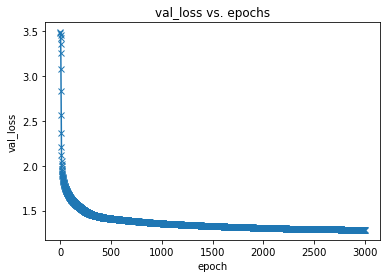

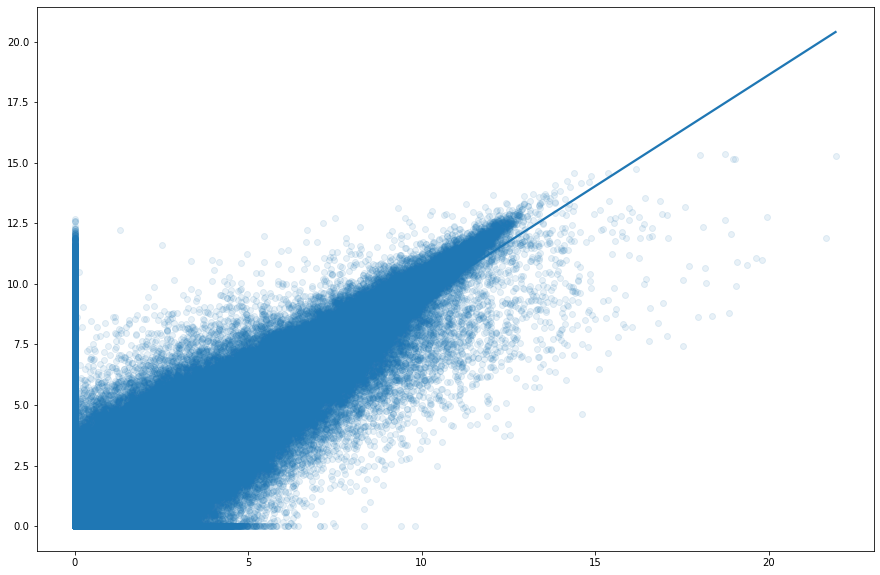

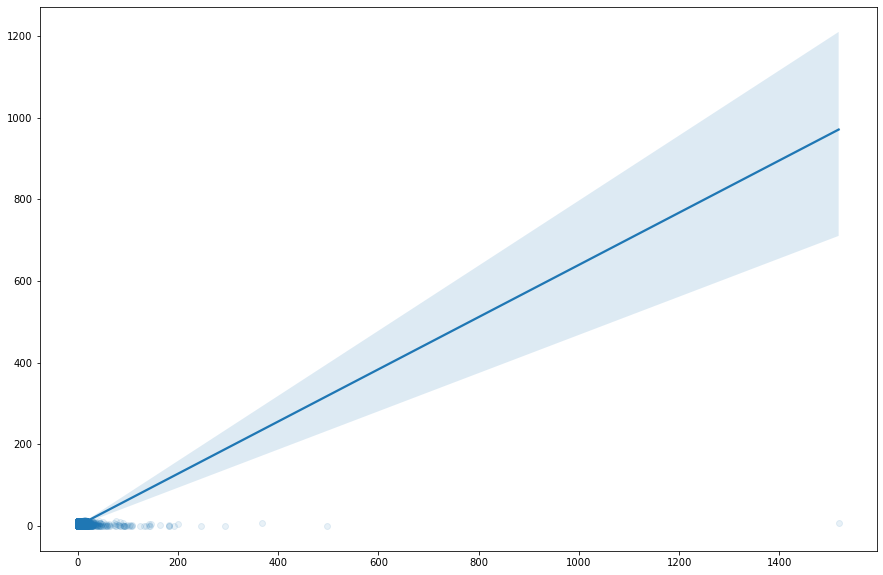

<Figure size 1440x1080 with 0 Axes>

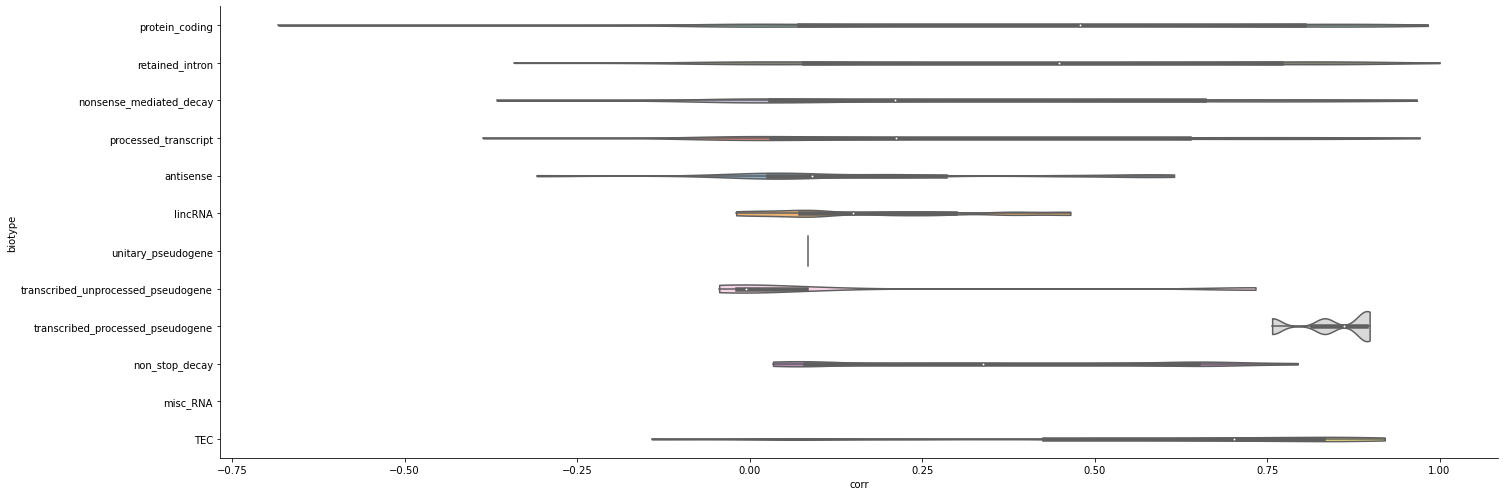

<Figure size 1440x1080 with 0 Axes>

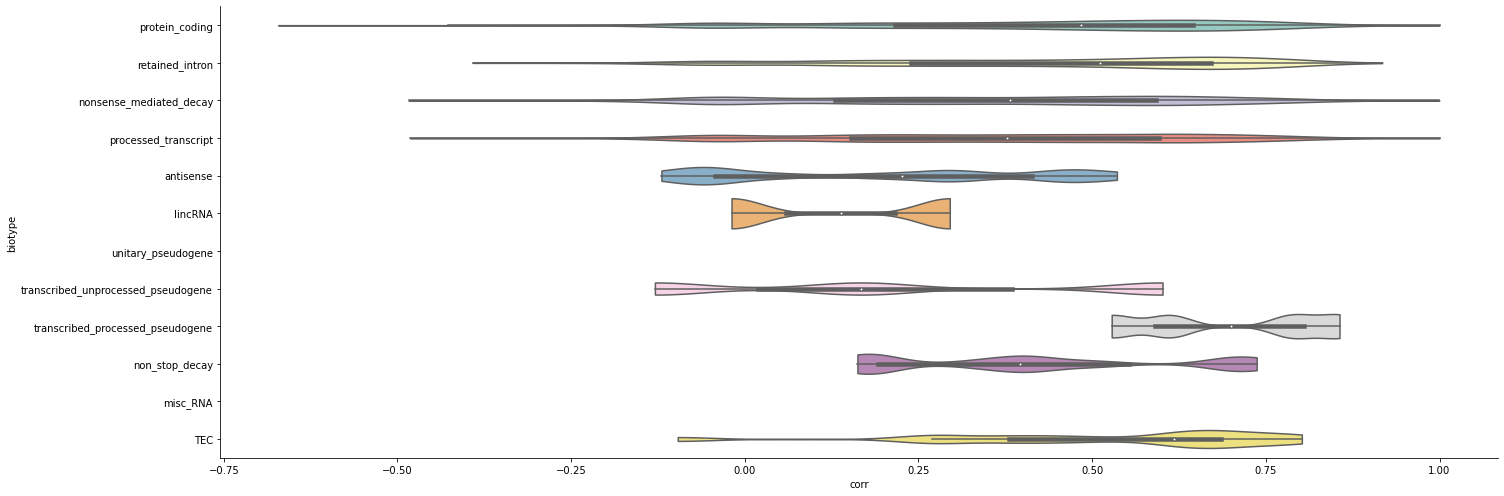

In [34]:
for i in learning_rate:
    for j in optim:
        
        config = Config(epochs = 3000,
                        optimizer = j,
                        learning_rate = i,
                        num_genes = 5000,
                        if_wandb='True')

        print(config.get_config(), '\n')

        # %%% Get the model
        model = utils.get_model(config, data_prep)
        optimizer = utils.build_optimizer(model, config.optimizer, config.learning_rate)

        # %%% Train
        history = utils.fit(config.epochs, config.learning_rate, 
                            model, 
                            data_prep.train_loader, 
                            data_prep.val_loader, 
                            optimizer=optimizer,
                            hyperparameters = config.get_config(),
                            if_wandb = config.if_wandb)

        # %%% Plot results
        solution = utils.plot_results(history = history, 
                     scaledTrain_df = data_prep.scaledTrain_df, 
                     train_labels = data_prep.train_labels, 
                     scaled_train_gn = data_prep.scaled_train_gn, 
                     scaledValidation_df = data_prep.scaledValidation_df, 
                     valid_labels = data_prep.valid_labels , 
                     scaled_valid_gn = data_prep.scaled_valid_gn, 
                     model = model, 
                     getBM = data_prep.getBM,
                     if_wandb = config.if_wandb)
        
        if if_wandb:
            wandb.finish()

        solution.solution_train_cor_total
        solution.solution_train_cor_trans 
        solution.solution_val_cor_total = solution_val_cor_total
        solution.solution_val_cor_trans = solution_val_cor_trans 